# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_excel('ObesityDataSet.xlsx')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,1.489790e+07,1.125941e+06,5.850877e+07,8.129461e+05,6.814160e+05,1.158451e+06,4.281866e+05,1.819331e+05
std,1.307597e+07,8.014948e+05,4.976613e+07,1.136965e+06,1.182663e+06,1.096148e+06,7.632395e+05,4.893283e+05
min,1.400000e+01,1.450000e+00,3.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,1.830000e+00,8.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,1.245050e-01,0.000000e+00
50%,1.922326e+07,1.631547e+06,6.880369e+07,3.000000e+00,3.000000e+00,1.221281e+06,1.000000e+00,6.253500e-01
75%,2.422283e+07,1.747596e+06,1.048240e+08,2.060030e+06,1.153420e+06,2.160736e+06,1.016148e+06,1.000000e+00
max,5.513788e+07,1.975663e+06,1.650573e+08,2.998441e+06,3.999591e+06,2.999495e+06,2.999918e+06,1.990617e+06


**Insight:**
- Dari data di atas terlihat bahwa di dalam dataset ini terdiri dari 16 feature dengan 8 diantaranya bertipe object, 4 bertipe float, dan 4 bertipe integer dengan total data entries adalah 2111
- Fitur Age, Weight, FCVC, NCP, CH2O, FAF, dan TUE memiliki statistik yang tidak realistis sehingga memerlukan tindakan untuk mengatasi nilai tidak realistis tersebut.

### 2. Menangani Data yang Hilang

In [5]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**Insight:**
- Tidak ada feature yang memiliki missing value sehingga tidak membutuhkan tindakan apapun.

### 3. Analisis Distribusi dan Korelasi

In [6]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = df.select_dtypes(include='object').columns

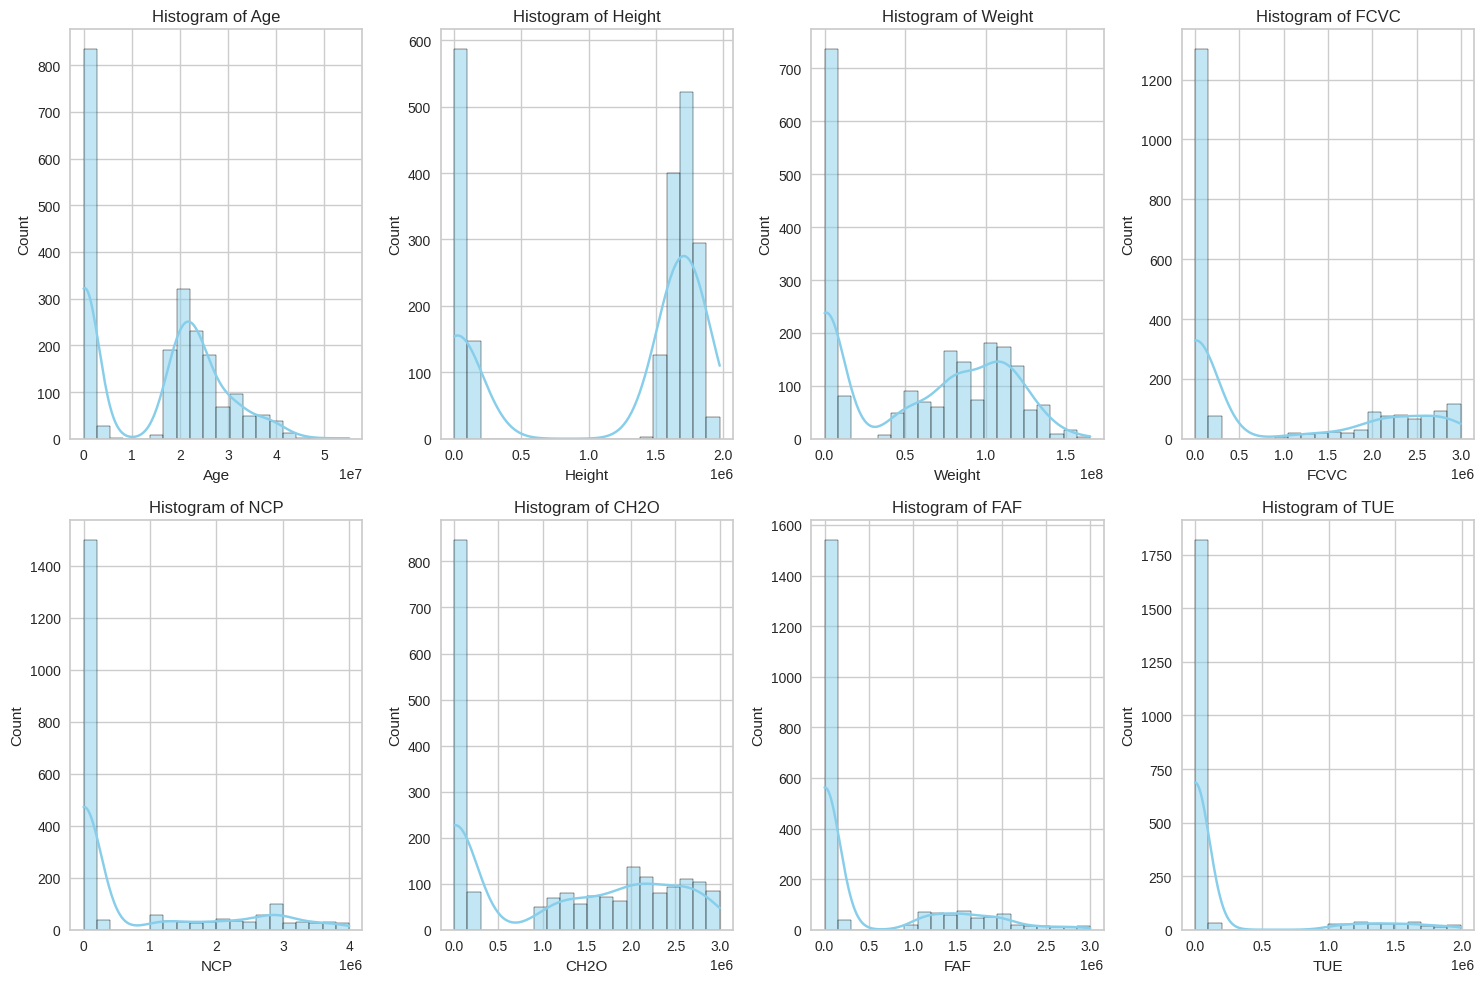

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

**Insight:**
- Hampir semua variabel menunjukkan distribusi skewed ke kanan dengan mayoritas nilai ada di bawah dan sedikit yang sangat tinggi.
- Beberapa histogram memperlihatkan dua puncak (bimodal) seperti Height dan Weight dan itu bisa menunjukkan dua kelompok berbeda.
- CH2O dan FCVC terlihat memiliki distribusi agak normal tapi tetap ada lonjakan di nilai-nilai rendah.

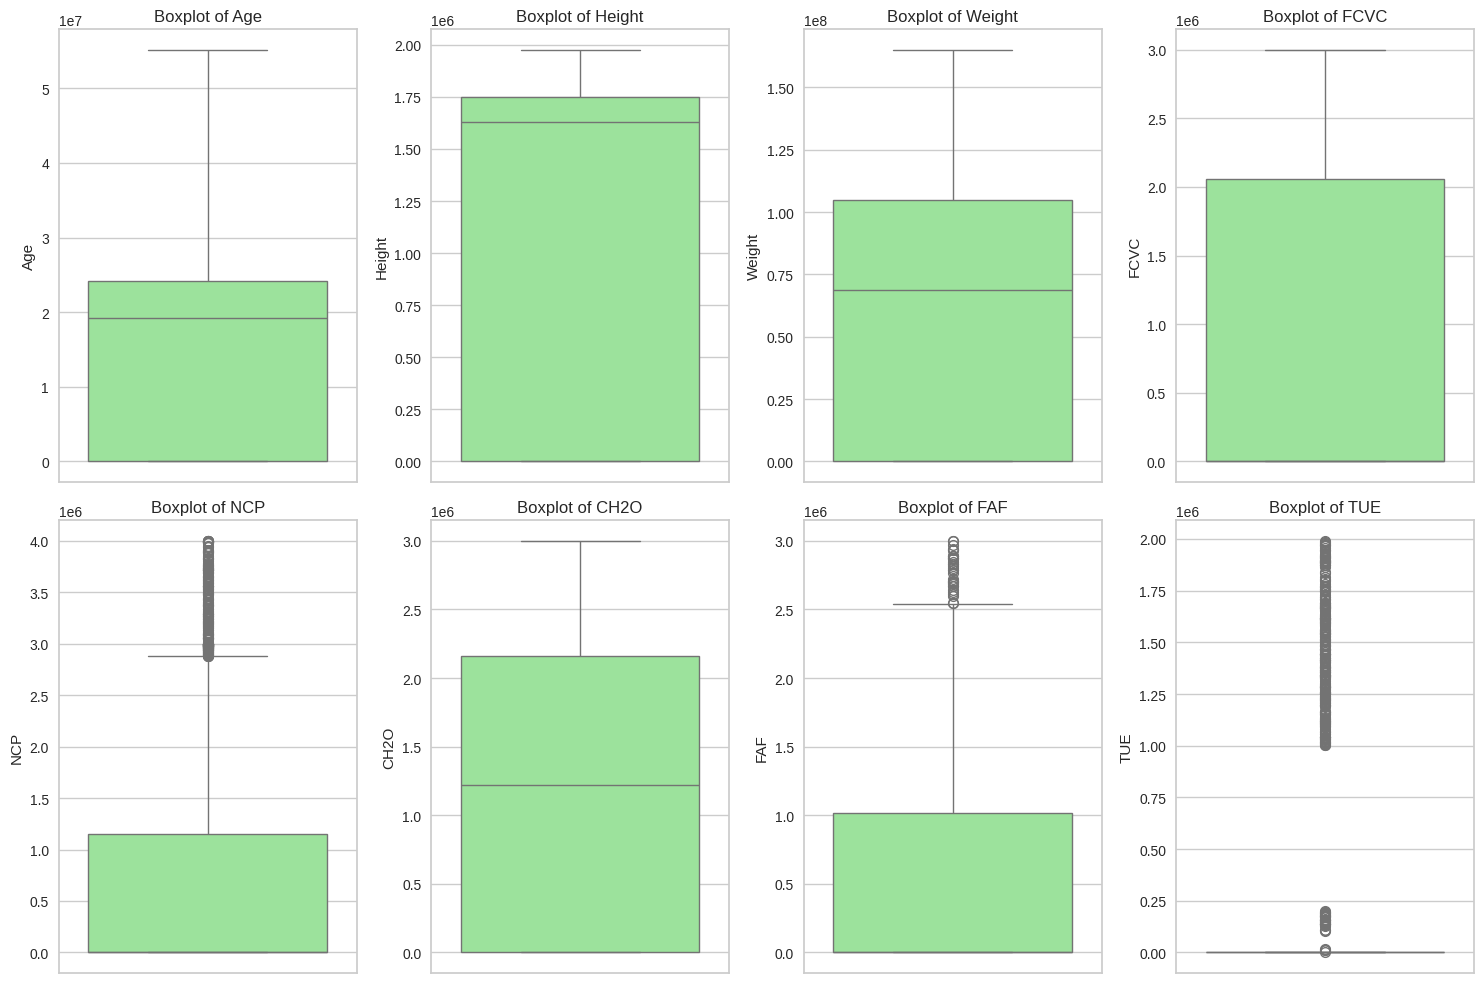

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Insight:**
- Nilai maksimum pada Age, Weight, Height, FAF, TUE sangat tinggi atau jauh di luar rentang umum dan kemungkinan data error.
- Banyak boxplot menunjukkan distribusi miring ke atas (right-skewed) seperti FAF dan TUE.
- CH2O (konsumsi air) dan FCVC (asupan sayuran) terlihat cukup merata tetapi tetap memiliki outlier yang terbilang ekstrim.

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
print("Matriks Korelasi:")
print(corr_matrix)

Matriks Korelasi:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000  0.526138  0.454658  0.363812  0.274697  0.360289  0.249301   
Height  0.526138  1.000000  0.577020  0.317907  0.258432  0.521067  0.285222   
Weight  0.454658  0.577020  1.000000  0.212021  0.093442  0.496288  0.234962   
FCVC    0.363812  0.317907  0.212021  1.000000  0.323805  0.233216  0.190660   
NCP     0.274697  0.258432  0.093442  0.323805  1.000000  0.149553  0.144980   
CH2O    0.360289  0.521067  0.496288  0.233216  0.149553  1.000000  0.217033   
FAF     0.249301  0.285222  0.234962  0.190660  0.144980  0.217033  1.000000   
TUE     0.086145  0.160804  0.048663  0.156198  0.090724  0.065760  0.036046   

             TUE  
Age     0.086145  
Height  0.160804  
Weight  0.048663  
FCVC    0.156198  
NCP     0.090724  
CH2O    0.065760  
FAF     0.036046  
TUE     1.000000  


**Insight:**
- Weight dan Height bernilai 0.577 yang berarti keduanya memiliki hubungan positif yang kuat dan hal itu wajar karena tinggi badan sering berkaitan dengan berat badan.
- Weight dan Age: bernilai 0.45 yang berarti keduanya memiliki korelasi sedang.
- Height dan Age bernilai 0.526 yang berarti ini bisa jadi anomali atau menunjukkan dataset mencampur remaja dan dewasa.
- Variabel seperti TUE (Waktu menggunakan teknologi) memiliki korelasi sangat lemah terhadap semua variabel lain dengan nilai maksimum sekitar 0.16.
- FAF (aktivitas fisik) juga tidak berkorelasi kuat dengan berat badan (0.23) dan ini bisa jadi karena pencatatan kurang presisi atau variabel lifestyle lainnya lebih dominan.

### 4. Visualisasi Data

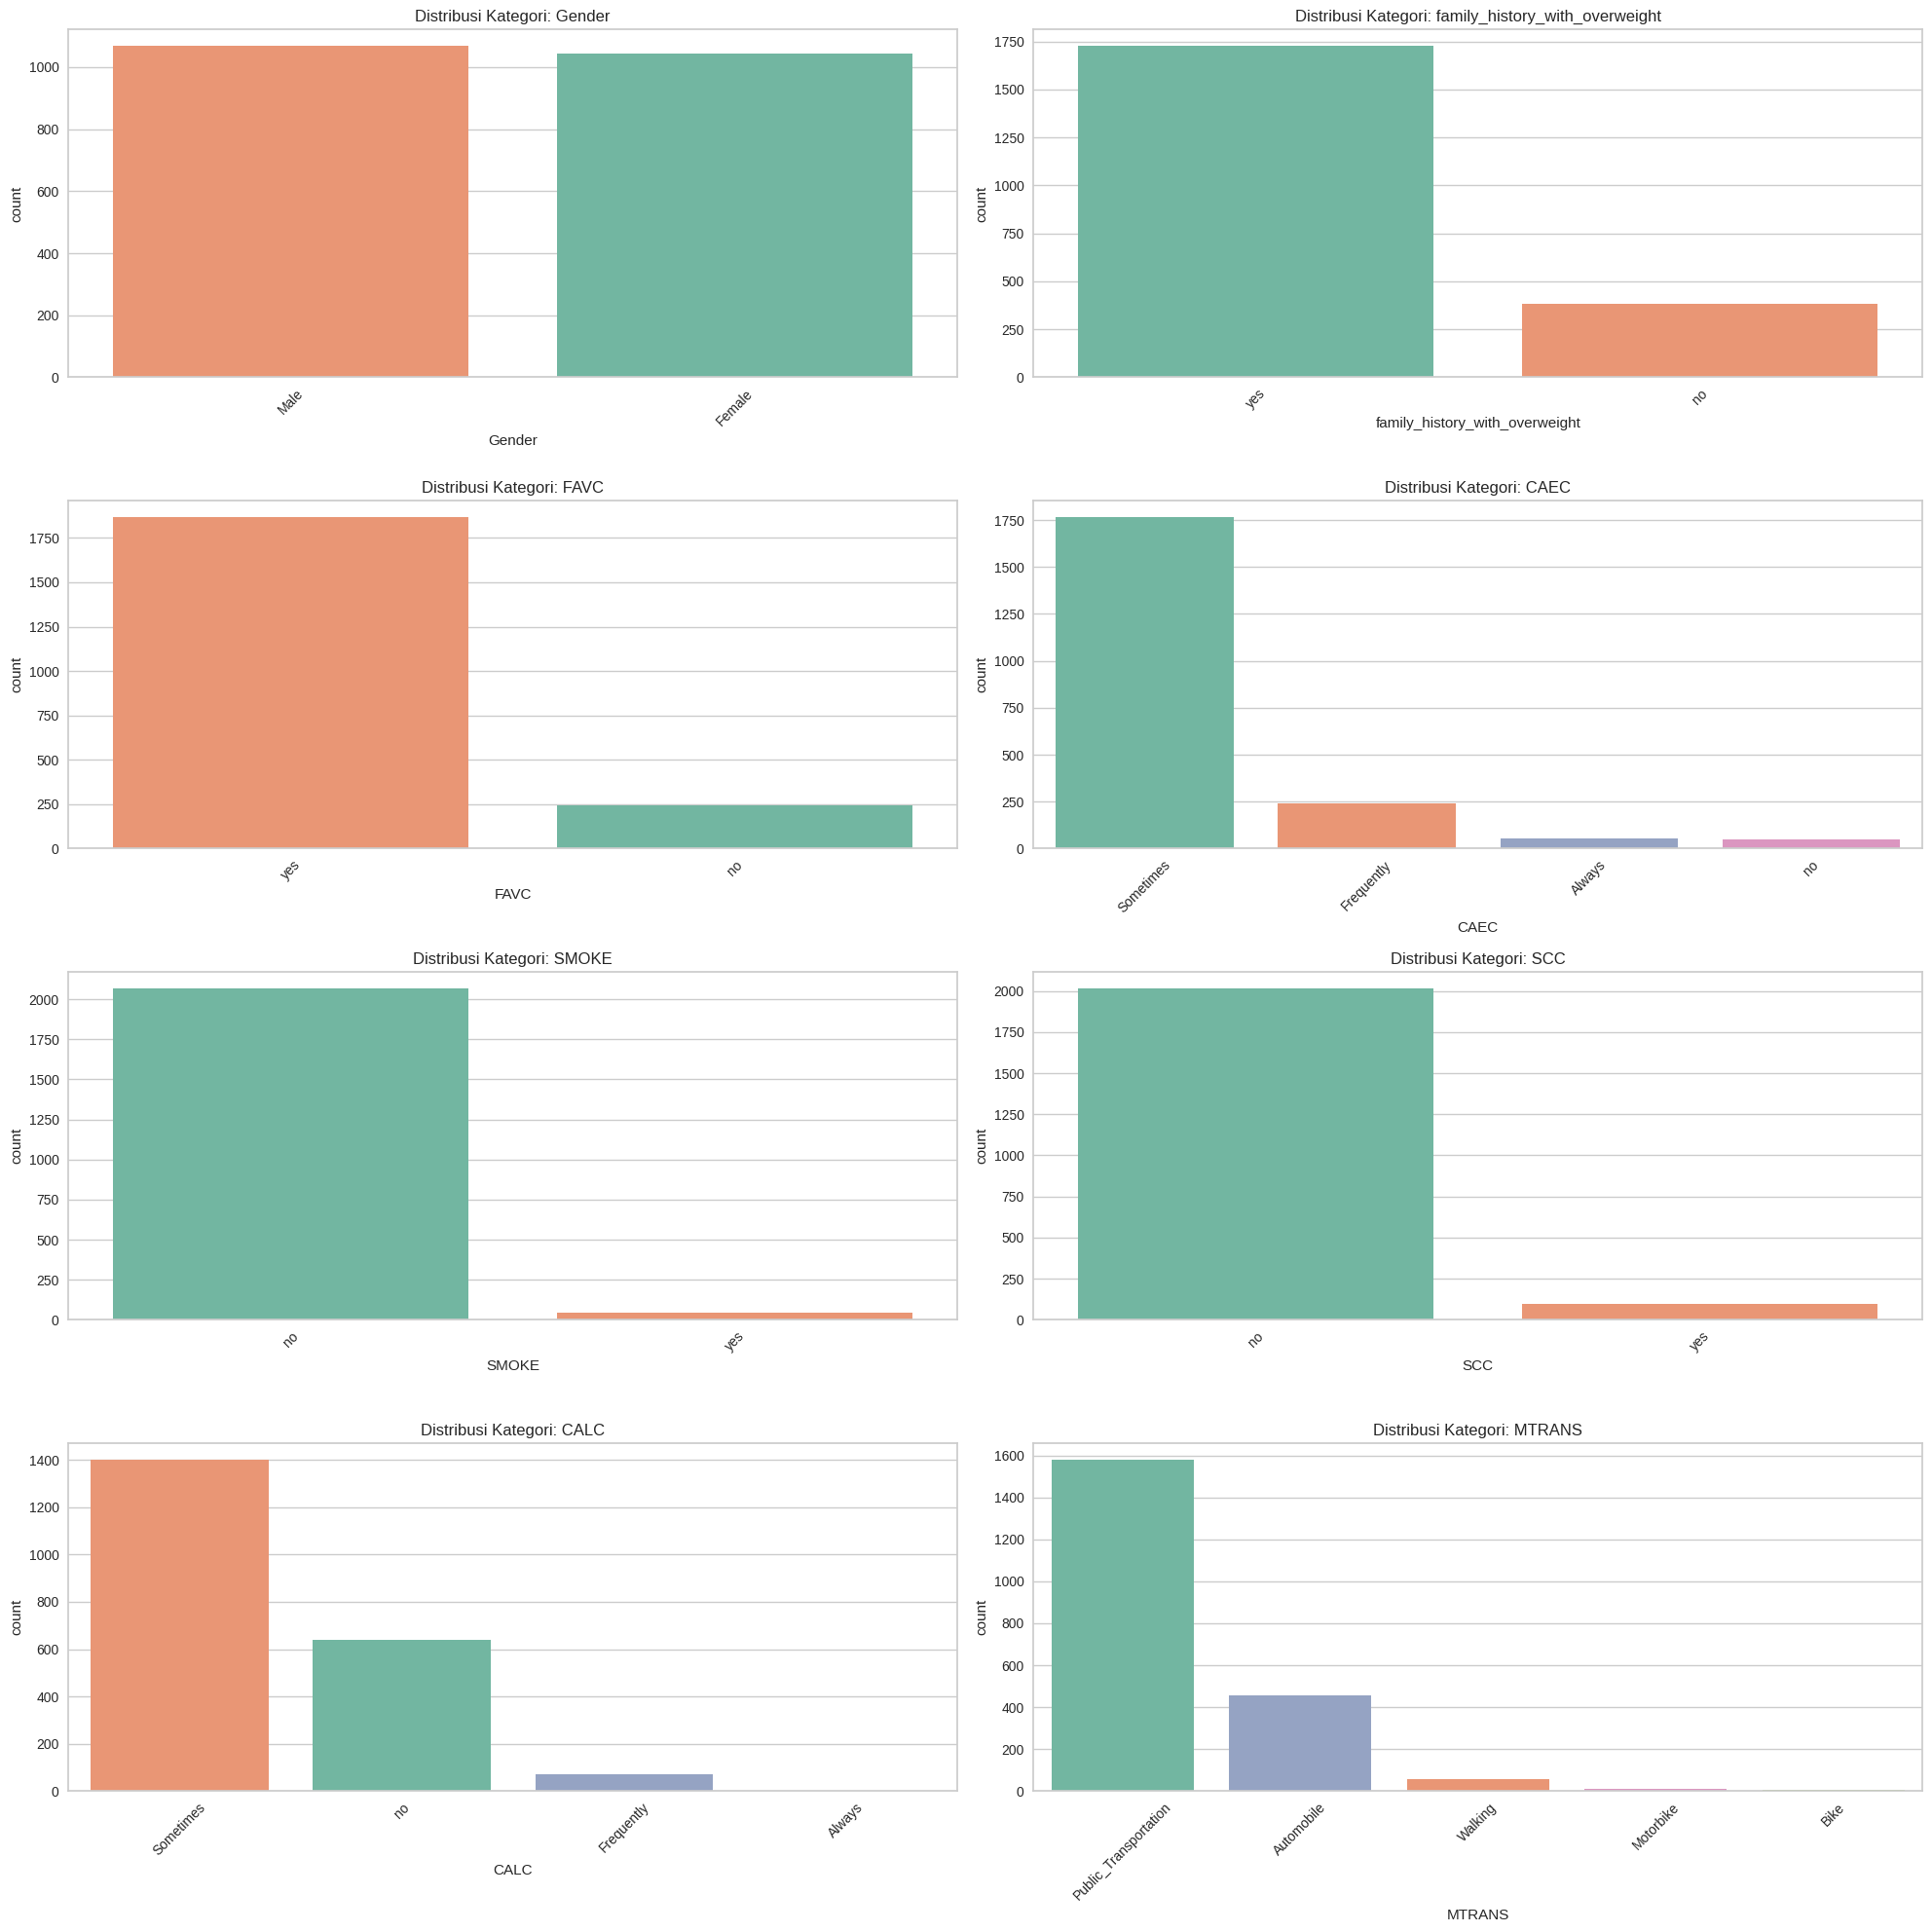

In [10]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False, order=df[col].value_counts().index)
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

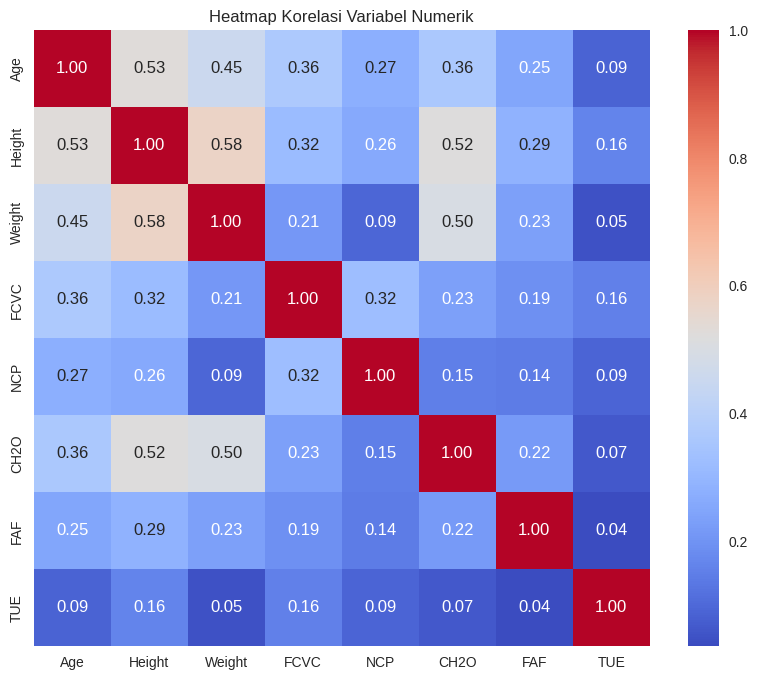

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

**Insight:**
- Weight dan Height bernilai 0.58 yang berarti keduanya memiliki hubungan positif yang kuat dan hal itu wajar karena tinggi badan sering berkaitan dengan berat badan.
- Weight dan Age: bernilai 0.45 yang berarti keduanya memiliki korelasi sedang.
- Height dan Age bernilai 0.53 yang berarti ini bisa jadi anomali atau menunjukkan dataset mencampur remaja dan dewasa.
- Variabel seperti TUE (Waktu menggunakan teknologi) memiliki korelasi sangat lemah terhadap semua variabel lain dengan nilai maksimum sekitar 0.16.
- FAF (aktivitas fisik) juga tidak berkorelasi kuat dengan berat badan (0.23) dan ini bisa jadi karena pencatatan kurang presisi atau variabel lifestyle lainnya lebih dominan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

###1. Menghapus atau Menangani Data Kosong (Missing Values)

In [12]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**Insight:** Tidak ada missing values.

###2. Menghapus Data Duplikat

In [13]:
df.duplicated().sum()

np.int64(24)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(2087, 16)

**Insight:** Terdapat 24 duplikasi data, namun telah teratasi dengan cara menghapus data duplikat.

###3. Normalisasi atau Standarisasi Fitur

In [17]:
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled_values, columns=numerical_cols)

In [18]:
df_scaled.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03,2.087000e+03
mean,2.723690e-17,2.723690e-16,-1.089476e-16,-1.361845e-17,1.361845e-17,-2.723690e-17,2.723690e-17,6.809226e-18
std,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00
min,-1.154793e+00,-1.429510e+00,-1.192212e+00,-7.214080e-01,-5.807208e-01,-1.070046e+00,-5.653869e-01,-3.743197e-01
25%,-1.154792e+00,-1.429510e+00,-1.192211e+00,-7.214071e-01,-5.807191e-01,-1.070046e+00,-5.653868e-01,-3.743197e-01
50%,3.264792e-01,6.208155e-01,2.160571e-01,-7.214062e-01,-5.807191e-01,6.488986e-02,-5.653856e-01,-3.743184e-01
75%,7.088253e-01,7.646191e-01,9.200070e-01,1.091805e+00,4.249824e-01,9.076444e-01,7.796585e-01,-3.743176e-01
max,3.070566e+00,1.050303e+00,2.132864e+00,1.909159e+00,2.789089e+00,1.669051e+00,3.350736e+00,3.674729e+00


**Insight:** Nilai rata-rata (mean) dari semua kolom numerik mendekati 0, nilai standar deviasi (std) mendekati 1, nilai menyebar dalam rentang yang bervariasi, biasanya sekitar -3 sampai +3, dan tidak muncul nilai seperti jutaan atau miliaran setelah standarisasi.

###4. Deteksi dan Penanganan Outlier

In [19]:
z_threshold = 3

outliers = (df[numerical_cols].abs() > z_threshold)
outlier_rows = df[outliers.any(axis=1)]

print("Jumlah baris dengan outlier:", len(outlier_rows))
print(outlier_rows)

Jumlah baris dengan outlier: 2087
      Gender       Age      Height       Weight  \
0     Female        21        1.62         64.0   
1     Female        21        1.52         56.0   
2       Male        23        1.80         77.0   
3       Male        27        1.80         87.0   
4       Male        22        1.78         89.8   
...      ...       ...         ...          ...   
2106  Female  20976842   171073.00  131408528.0   
2107  Female  21982942  1748584.00  133742943.0   
2108  Female  22524036  1752206.00  133689352.0   
2109  Female  24361936   173945.00  133346641.0   
2110  Female  23664709  1738836.00  133472641.0   

     family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE     CH2O  \
0                               yes   no     2    3  Sometimes    no        2   
1                               yes   no     3    3  Sometimes   yes        3   
2                               yes   no     2    3  Sometimes    no        2   
3                            

In [20]:
outlier_flags = outliers[outliers.any(axis=1)]
print("Fitur-fitur yang jadi outlier di setiap baris:")
print(outlier_flags)

Fitur-fitur yang jadi outlier di setiap baris:
       Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
0     True   False    True  False  False  False  False  False
1     True   False    True  False  False  False  False  False
2     True   False    True  False  False  False  False  False
3     True   False    True  False  False  False  False  False
4     True   False    True  False  False  False  False  False
...    ...     ...     ...    ...    ...    ...    ...    ...
2106  True    True    True  False  False   True   True  False
2107  True    True    True  False  False   True   True  False
2108  True    True    True  False  False   True   True  False
2109  True    True    True  False  False   True   True  False
2110  True    True    True  False  False   True   True  False

[2087 rows x 8 columns]


**Insight:** Berdasarkan data describe di atas, fitur numerik pada dataset memiliki nilai statistik yang tidak realistis sehingga memerlukan tindakan untuk membuat nilai-nilai ruas tersebut menjadi lebih realistis.

In [21]:
def clean_outliers(df, numerical_cols, z_thresh=3):
    df_clean = df.copy()

    df_clean = df_clean[
        (df_clean['Age'] < 100) &
        (df_clean['Height'] < 2.5) &
        (df_clean['Weight'] < 200)
    ]

    df_numeric = df_clean[numerical_cols]
    df_zscore = (df_numeric - df_numeric.mean()) / df_numeric.std()

    outliers = df_zscore.abs() > z_thresh

    for col in numerical_cols:
        median = df_clean[col].median()
        df_clean.loc[outliers[col], col] = median

    print("Selesai: Data ekstrem dihapus dan outlier ringan diimputasi.")
    return df_clean

In [22]:
df_bersih = clean_outliers(df, numerical_cols)

print("Jumlah data setelah dibersihkan:", len(df_bersih))
df_bersih.head()

Selesai: Data ekstrem dihapus dan outlier ringan diimputasi.
Jumlah data setelah dibersihkan: 490


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0.0,1.0,no,Public_Transportation
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2.0,0.0,Frequently,Walking
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0.0,0.0,Sometimes,Public_Transportation


In [23]:
print(df_bersih['Age'].value_counts().sort_index())

Age
14     1
15     1
16     8
17    27
18    69
19    49
20    45
21    73
22    35
23    54
24    18
25    15
26    15
27    11
28     1
29     8
30     8
31     4
32     3
33    12
34     5
35     3
36     3
37     3
38     7
39     3
40     4
41     5
Name: count, dtype: int64


**Insight:** Di atas adalah distribusi fitur Age yang telah dibersihkan dari outlier.

**Insight:**
- Fitur numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) telah berhasil distandarisasi menggunakan StandardScaler dan nilainya sekarang berada dalam skala sekitar -3 hingga +3 dengan rata-rata mendekati 0 dan standar deviasi mendekati 1.
- Terdapat 1621 data dengan outlier ekstrem sehingga tindakan yang paling tepat dilakukan adalah dengan cara menghapus data tersebut.

###5. Encoding Data Kategorikal

In [24]:
df_encoded = pd.get_dummies(df_bersih, columns=categorical_cols, drop_first=True)
print(f"Jumlah data setelah encoding: {df_encoded.shape[0]}")
print(f"Jumlah fitur setelah encoding: {df_encoded.shape[1]}")

Jumlah data setelah encoding: 490
Jumlah fitur setelah encoding: 23


**Insight:** Seluruh data kategorikal hasil dari operas-operasi sebelumnya berhasil di encoding dan dapat digukanan untuk proses selanjutnya.

###6. Binning (Pengelompokan Data)

In [25]:
df_binned = df_encoded.copy()
df_binned['Weight'] = df_bersih['Weight'].values

bins = [0, 50, 70, 90, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_binned['Weight_Category'] = pd.cut(df_binned['Weight'], bins=bins, labels=labels, right=False)

print(df_binned['Weight_Category'].value_counts())

Weight_Category
Normal         241
Overweight     164
Obese           51
Underweight     34
Name: count, dtype: int64


In [26]:
df_binned[['Weight', 'Weight_Category']].head(10)

,Weight,Weight_Category
0,64.0,Normal
1,56.0,Normal
2,77.0,Overweight
3,87.0,Overweight
4,89.8,Overweight
5,53.0,Normal
6,55.0,Normal
7,53.0,Normal
8,64.0,Normal
9,68.0,Normal


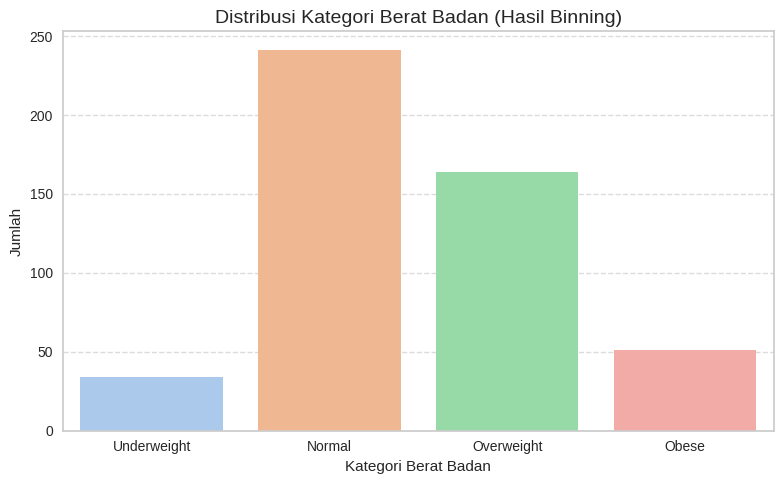

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_binned, x='Weight_Category', hue='Weight_Category', palette='pastel', legend=False)

plt.title('Distribusi Kategori Berat Badan (Hasil Binning)', fontsize=14)
plt.xlabel('Kategori Berat Badan')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:** Berdasarkan hasil tersebut, seluruh data dalam dataset dibagi menjadi beberapa kategori yaitu Underweight (berat badan kurang), Normal (berat badan normal), Overweight (berat badan berlebih), dan Obese (Obesitas). Dan terdapat 51 data entries yang masuk ke dalam kategori Obesitas, 241 data entries yang masuk ke dalam kategori Normal, 164 data entries yang masuk ke dalam kategori Overweight, dan terdapat 34 data entries yang masuk ke dalam kategori Underweight.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

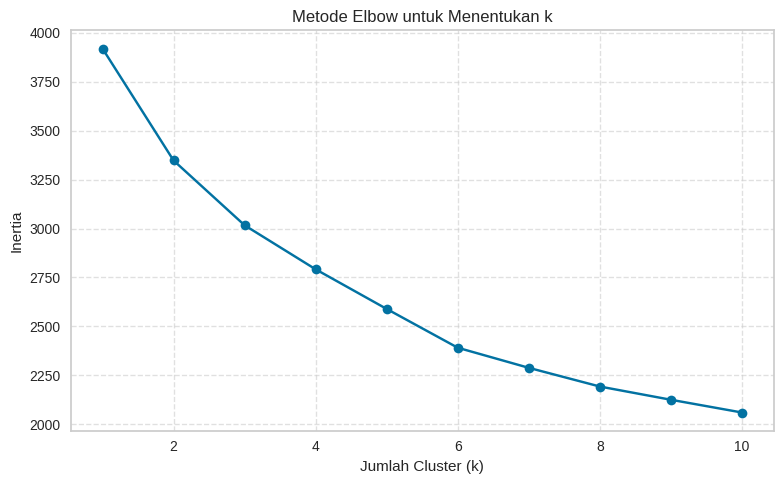

In [28]:
X = df_binned[numerical_cols]
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi grafik metode elbow di atas, kurva menurun tajam dari k=1 hingga k=3 dan penurunan mulai melambat setelah k=3.
- Dalam metode Elbow, titik di mana penurunan inersia melambat secara signifikan ("siku") menunjukkan jumlah cluster optimal dan berdasarkan grafik k=3 bisa menjadi pilihan yang baik.

In [29]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_binned['Cluster'] = kmeans.fit_predict(X_scaled)

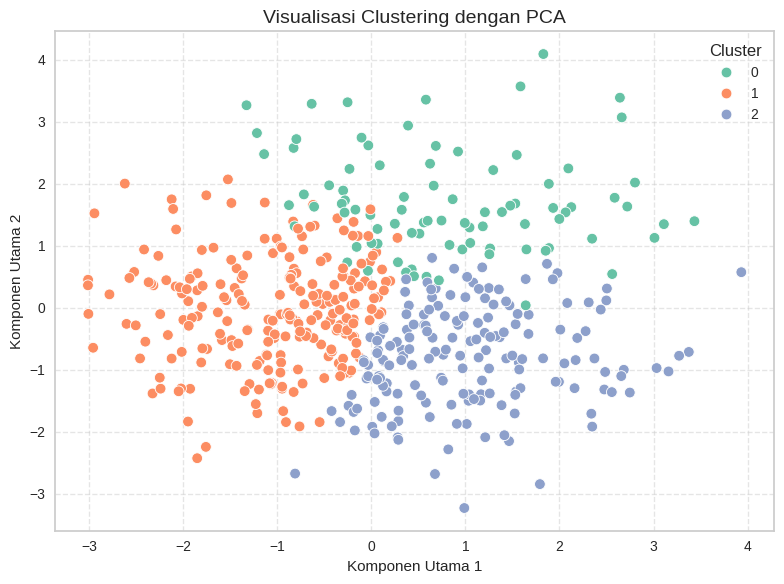

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_binned['PCA1'] = X_pca[:, 0]
df_binned['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_binned, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Clustering dengan PCA', fontsize=14)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Data terbagi menjadi 3 cluster yang dibedakan dengan warna (hijau, oranye, dan biru).
- Terdapat beberapa titik dari cluster yang berbeda yang saling tumpang tindih di tengah yang menunjukkan adanya potensi kesalahan pengelompokan
- Tumpang tindih antara beberapa cluster menunjukkan adanya kemiripan karakteristik antara kelompok-kelompok tersebut atau kebutuhan untuk dimensi tambahan dalam pengelompokan.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

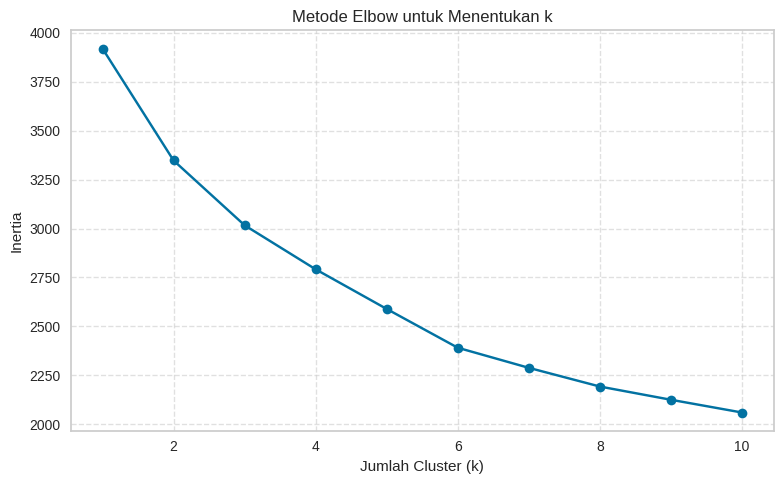

In [31]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi grafik metode elbow di atas, kurva menurun tajam dari k=1 hingga k=3 dan penurunan mulai melambat setelah k=3.
- Dalam metode Elbow, titik di mana penurunan inersia melambat secara signifikan ("siku") menunjukkan jumlah cluster optimal dan berdasarkan grafik sehingga k=3 bisa menjadi pilihan yang baik.

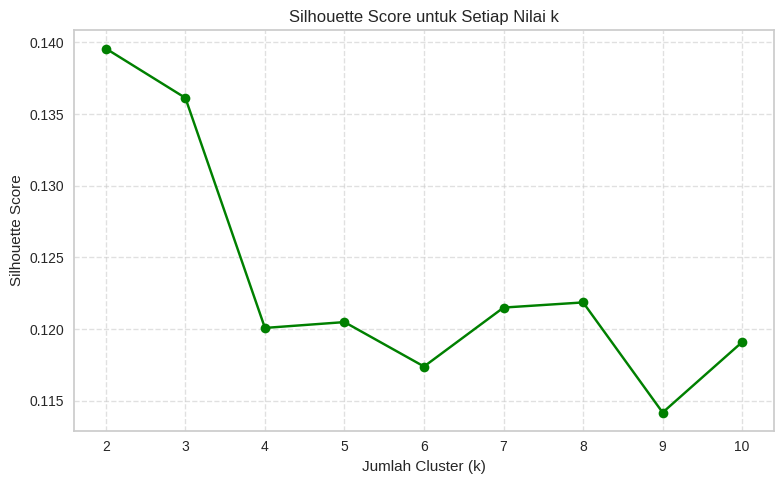

In [32]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    cluster_labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    silhouette = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score untuk Setiap Nilai k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [33]:
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score tertinggi: {max(silhouette_scores):.4f}")

Jumlah cluster optimal berdasarkan Silhouette Score: 2
Silhouette Score tertinggi: 0.1396


**Insight:**
- Nilai tertinggi Silhouette Score berada pada k = 2 (sekitar 0.139) yang menandakan bahwa dua cluster memberikan pemisahan yang paling baik dalam hal kepadatan dan jarak antar cluster. Namun k = 3 juga memiliki skor yang masih cukup tinggi (sekitar 0.136) dan hanya sedikit lebih rendah dari k = 2.
- Nilai-nilai setelah k = 3 menurun tajam dan tidak menunjukkan peningkatan signifikan yang berarti bahwa menambah jumlah cluster malah memperburuk kualitas clustering.



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [34]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_binned['Cluster'] = kmeans.fit_predict(X_scaled)

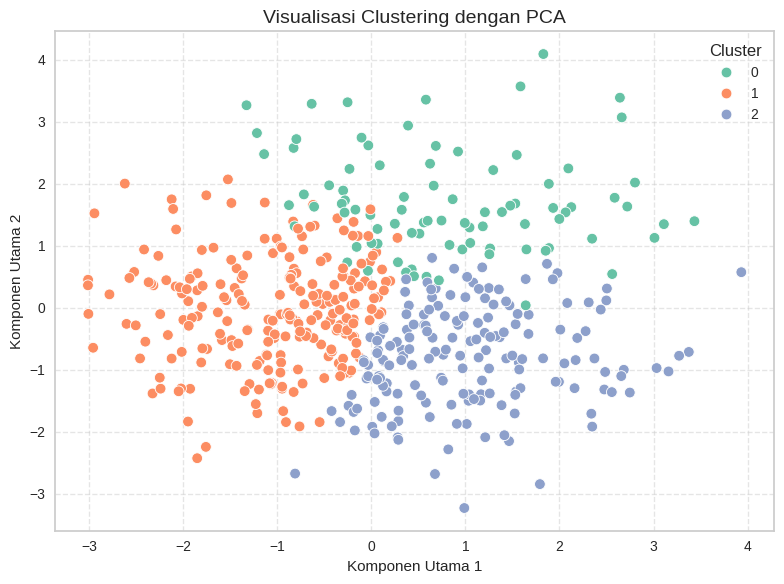

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_binned['PCA1'] = X_pca[:, 0]
df_binned['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_binned, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Clustering dengan PCA', fontsize=14)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Data terbagi menjadi 3 cluster yang dibedakan dengan warna (hijau, oranye, dan biru).
- Terdapat beberapa titik dari cluster yang berbeda yang saling tumpang tindih di tengah yang menunjukkan adanya potensi kesalahan pengelompokan
- Tumpang tindih antara beberapa cluster menunjukkan adanya kemiripan karakteristik antara kelompok-kelompok tersebut atau kebutuhan untuk dimensi tambahan dalam pengelompokan.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [36]:
df_normalized = df_binned.copy()
df_normalized['Cluster'] = kmeans.labels_

In [37]:
def inverse_dummies(df_encoded, original_df, categorical_cols):
    df_reconstructed = df_encoded.copy()

    for col in categorical_cols:
        dummy_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]

        if not dummy_cols:
            df_reconstructed[col] = original_df[col].values
            continue

        def get_original_value(row):
            for dummy in dummy_cols:
                if row[dummy] == 1:
                    return dummy.replace(col + '_', '')
            return original_df[col].mode()[0]

        df_reconstructed[col] = df_encoded[dummy_cols].apply(get_original_value, axis=1)
        df_reconstructed.drop(columns=dummy_cols, inplace=True)

    return df_reconstructed

In [38]:
df_reconstructed = inverse_dummies(df_encoded, df_bersih, categorical_cols)

In [39]:
df_final = df_reconstructed.copy()

for col in df_scaled.columns:
    df_final[col] = df_binned[col].values

df_final['Cluster'] = kmeans.labels_
df_final['Weight_Category'] = df_binned['Weight_Category']

In [40]:
print(df_final.head())
print(df_final['Cluster'].value_counts())

   Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE Gender  \
0   21    1.62    64.0     2    3     2  0.0  1.0   Male   
1   21    1.52    56.0     3    3     3  3.0  0.0   Male   
2   23    1.80    77.0     2    3     2  2.0  1.0   Male   
3   27    1.80    87.0     3    3     2  2.0  0.0   Male   
4   22    1.78    89.8     2    1     2  0.0  0.0   Male   

  family_history_with_overweight FAVC       CAEC SMOKE  SCC        CALC  \
0                            yes  yes  Sometimes    no   no          no   
1                            yes  yes  Sometimes   yes  yes   Sometimes   
2                            yes  yes  Sometimes    no   no  Frequently   
3                            yes  yes  Sometimes    no   no  Frequently   
4                            yes  yes  Sometimes    no   no   Sometimes   

                  MTRANS  Cluster Weight_Category  
0  Public_Transportation        1          Normal  
1  Public_Transportation        1          Normal  
2  Public_Transportation        

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [41]:
df_normalized[numerical_cols] = scaler.inverse_transform(df_normalized[numerical_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [42]:
cluster_summary = df_binned.groupby('Cluster')[numerical_cols].describe()
print(cluster_summary)

           Age                                                     Height  \
         count       mean       std   min   25%   50%    75%   max  count   
Cluster                                                                     
0         86.0  31.674419  5.771006  20.0  27.0  32.0  36.75  41.0   86.0   
1        232.0  20.672414  2.815467  16.0  18.0  21.0  22.00  35.0  232.0   
2        172.0  20.732558  2.981127  14.0  18.0  20.0  23.00  33.0  172.0   

                   ...  FAF         TUE                                     \
             mean  ...  75%  max  count      mean       std  min  25%  50%   
Cluster            ...                                                       
0        1.700814  ...  2.0  3.0   86.0  0.313953  0.579282  0.0  0.0  0.0   
1        1.626767  ...  1.0  3.0  232.0  0.663793  0.732002  0.0  0.0  1.0   
2        1.761512  ...  3.0  3.0  172.0  0.837209  0.715092  0.0  0.0  1.0   

                    
          75%  max  
Cluster             
0    

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Usia:** 31.67 tahun (tertua di antara semua cluster)
- **Rata-rata Tinggi Badan:** 1.72 m
- **Rata-rata Berat Badan:** Sekitar 89.8 kg (dominan overweight)
- **Rata-rata Aktivitas Fisik (FAF):** 1.70 (tingkat aktivitas fisik sedang)
- **Rata-rata Penggunaan Teknologi (TUE):** 0.31 (terendah di antara cluster)
- **Modus Gender:** Male
- **Modus Konsumsi Kalori Tinggi (FAVC):** Yes
- **Modus Pola Makan di Luar Waktu (CAEC):** Sometimes
- **Modus Konsumsi Alkohol (CALC):** Sometimes
- **Modus Moda Transportasi (MTRANS):** Public Transportation
- **Modus Kategori Berat Badan:** Overweight
- **Analisa:** Cluster ini terdiri dari orang dewasa dengan kecenderungan kelebihan berat badan. Mereka memiliki aktivitas fisik moderat namun sangat rendah dalam waktu penggunaan teknologi (TUE) yang bisa berarti mereka memiliki gaya hidup non-digital (bekerja manual dan lebih banyak waktu offline). Kebiasaan makan yang kurang terkontrol dan konsumsi alkohol sesekali memperkuat profil gaya hidup kurang sehat. Cluster ini cocok menjadi target utama untuk program penurunan berat badan dan edukasi gaya hidup sehat untuk usia dewasa.

## Cluster 1:
- **Jumlah Individu:** 232 (cluster terbesar)
- **Rata-rata Usia:** 20.67 tahun
- **Rata-rata Tinggi Badan:** Sekitar 1.68 m
- **Rata-rata Berat Badan:** Sekitar 64 kg (dominan normal)
- **Rata-rata Aktivitas Fisik (FAF):** 1.63
- **Rata-rata Penggunaan Teknologi (TUE):** 0.66
- **Modus Gender:** Male
- **Modus Konsumsi Kalori Tinggi (FAVC):** Yes
- **Modus Pola Makan di Luar Waktu (CAEC):** Sometimes
- **Modus Konsumsi Alkohol (CALC):** Sometimes
- **Modus Moda Transportasi (MTRANS):** Public Transportation
- **Modus Kategori Berat Badan:** Normal
- **Analisa:** Cluster ini mewakili populasi remaja/dewasa muda yang cenderung sehat dengan berat badan normal. Mereka aktif secara fisik dalam tingkat yang moderat dan memiliki keseimbangan antara aktivitas dan relaksasi digital (TUE yang sedang). Pola konsumsi makanan tinggi kalori tetap ada tapi seimbang dengan gaya hidup yang aktif. Cluster ini cocok untuk dijadikan model gaya hidup sehat dan bisa menjadi segmen sasaran edukasi preventif agar tidak berpindah ke status overweight.

## Cluster 3:
- **Jumlah Individu:** 172
- **Rata-rata Usia:** 20.73 tahun
- **Rata-rata Tinggi Badan:** Sekitar 1.70 m
- **Rata-rata Berat Badan:** Sekitar 87 kg (dominan overweight)
- **Rata-rata Aktivitas Fisik (FAF):** 1.76 (tertinggi di antara semua cluster)
- **Rata-rata Penggunaan Teknologi (TUE):** 0.84 (tertinggi di antara semua cluster)
- **Modus Gender:** Male
- **Modus Konsumsi Kalori Tinggi (FAVC):** Yes
- **Modus Pola Makan di Luar Waktu (CAEC):** Sometimes
- **Modus Konsumsi Alkohol (CALC):** Frequently
- **Modus Moda Transportasi (MTRANS):** Kombinasi Walking dan Public Transportation
- **Modus Kategori Berat Badan:** Overweight
- **Analisa:** Cluster ini cukup menarik karena berisi individu muda yang aktif secara fisik namun tetap memiliki status berat badan berlebih. Faktor yang berkontribusi kemungkinan adalah tingkat konsumsi alkohol yang tinggi dan kebiasaan makan berkalori tinggi yang tidak sebanding dengan aktivitas fisik mereka. Penggunaan teknologi juga tinggi yang mungkin menunjukkan gaya hidup digital-native tapi juga bisa menunjukkan kecenderungan stres atau pola tidur buruk. Cluster ini cocok untuk intervensi berbasis pola makan dan edukasi gaya hidup sehat bukan hanya aktivitas fisik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
df_final.to_csv("dataset_clustering_result.csv", index=False)